In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


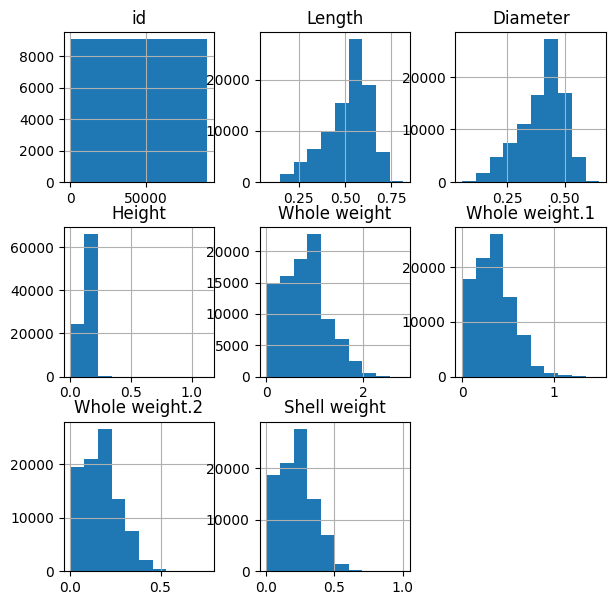

In [ ]:
Data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/abalone/train.csv')
result=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/abalone/test.csv')
y=Data['Rings'].copy()
x=Data.drop('Rings',axis=1).copy()

x.hist(figsize=(7,7));

In [ ]:
dummies =pd.get_dummies(x['Sex']).astype(int)
dummies.drop('I',axis=1,inplace=True)
x=x.assign(**dummies)
dummies =pd.get_dummies(result['Sex']).astype(int)
dummies.drop('I',axis=1,inplace=True)
result=result.assign(**dummies)


x.drop('Sex',axis=1,inplace=True)
result.drop('Sex',axis=1,inplace=True)
x

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,M
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,1,0
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,1,0
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,0,0
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,0,1
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,0,0
...,...,...,...,...,...,...,...,...,...,...
90610,90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,0,1
90611,90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,0,1
90612,90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,0,0
90613,90613,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,0,0


In [ ]:
train_duplicates_number = Data[Data.duplicated()]
Data = Data.drop_duplicates()

def describe(df):
  desc=pd.DataFrame()
  desc['dtype']=df.dtypes
  desc['null']=df.isnull().sum()
  desc['%null'] = desc['null'] / len(df) * 100
  desc['unique']=df.nunique()
  #desc['%unique'] = desc['nunique'] /len(df)*100
  desc = pd.concat([desc,df.describe().T.drop('count',axis=1)],axis=1)
  display(desc)
describe(x)

,dtype,null,%null,unique,mean,std,min,25%,50%,75%,max
id,int64,0,0.0,90615,45307.000000,26158.441658,0.0000,22653.5000,45307.0000,67960.5000,90614.0000
Length,float64,0,0.0,157,0.517098,0.118217,0.0750,0.4450,0.5450,0.6000,0.8150
Diameter,float64,0,0.0,126,0.401679,0.098026,0.0550,0.3450,0.4250,0.4700,0.6500
Height,float64,0,0.0,90,0.135464,0.038008,0.0000,0.1100,0.1400,0.1600,1.1300
Whole weight,float64,0,0.0,3175,0.789035,0.457671,0.0020,0.4190,0.7995,1.0675,2.8255
Whole weight.1,float64,0,0.0,1799,0.340778,0.204428,0.0010,0.1775,0.3300,0.4630,1.4880
Whole weight.2,float64,0,0.0,979,0.169422,0.100909,0.0005,0.0865,0.1660,0.2325,0.7600
Shell weight,float64,0,0.0,1129,0.225898,0.130203,0.0015,0.1200,0.2250,0.3050,1.0050
F,int64,0,0.0,2,0.292391,0.454863,0.0000,0.0000,0.0000,1.0000,1.0000
M,int64,0,0.0,2,0.342405,0.474517,0.0000,0.0000,0.0000,1.0000,1.0000


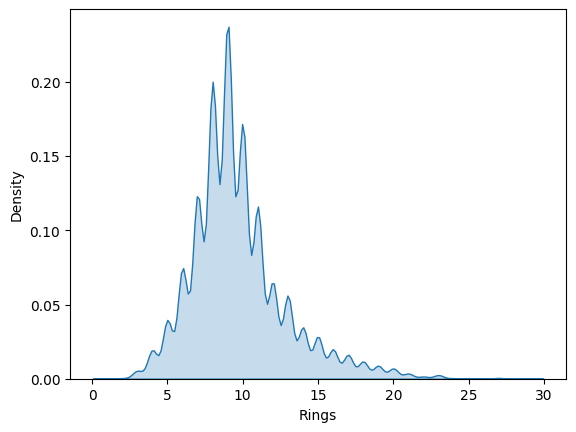

In [ ]:
from sklearn .model_selection import train_test_split
import seaborn as sns
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y                              )
#np.bincount(y)
sns.kdeplot(y, fill=True);


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import AdaBoostClassifier#,GradientBoostingClassfier
# best_forest=RandomForestRegressor(
#     n_estimators=544,
#     min_samples_leaf=60,
#     max_depth=8,
#     min_samples_split=13,
#     random_state=27
# )

# best_forest.fit(xtr,ytr)
# best_forest.score(xte,yte)


In [ ]:
!pip install scikit-optimize
!pip install optuna
!pip install catboost

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytr = le.fit_transform(ytr)


In [ ]:
# from xgboost import XGBClassifier
# from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
# from skopt.space import Integer, Real
# model=XGBClassifier(
#      learning_rate =0.1, max_depth=4,
#  min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'multi: softmax',seed=27)

# #gridsearchcv
# param={
#     'min_child_weight':range(1,6,2),
#     # 'max_depth':[4,5,6],
#     # 'gamma':[(i/10.0) for i in range(0,5)],
#     # #'max_leaf_nodes':
#     # 'subsample':[i/10.0 for i in range(6,10)],
#     # 'colsample_bytree':[i/10.0 for i in range(6,10)],
#     # 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
# }

# #skopt
# param_space=[
#     Integer(1,6,name='min_child_weight'),
#     # Integer(3,10,name='max_depth'),
#     # Real(0,0.5,name='gamma'),
#     # Real(0.5,1,name='subsample'),
#     # Real(0.5,1,name='colsample_bytree'),
#     # Real(1e-5,100,name='reg_aplha')

# ]

# #bayessearch
# paramss={
#     'min_child_weight':(1,3),
#     # 'max_depth':(4,6),
#     # 'gamma':(0,0.5),
#     # #'max_leaf_nodes':
#     # 'subsample':(0.6,1.0),
#     # 'colsample_bytree':(0.6,1.0),
#     # 'reg_alpha':(0.0.05),
# }

# #hyperopt
# param_spaces={

#     "min_child_weight":hp.randint('min_child_weight',1,6),
#   #   "max_depth" :hp.quniform('max_depth',3,10),
#   #   "gamma":hp.uniform('gamma',0,0.5),
#   #   "subsample":hp.uniform('subsample',0.5,1),
#   #  "colsample_bytree":hp.uniform('colsample_bytree',0.5,1),
#   #  "reg_aplha":hp.uniform('reg_aplha',1e-5,100),

# }

# #optuna
# def create(trial):
#   params = {
#           "min_child_weight":trial.suggest_int('min_child_weight',1,6),
#           "max_depth": trial.suggest_int("max_depth", 3, 10),
#         #   "iterations": 100,
#         #   "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
#         #   "subsample": trial.suggest_float("subsample", 0.05, 1.0),
#         #   "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
#         #   "reg_aplha":trial.suggest_float('reg_aplha',1e-5,100),
#         #  # "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
#       }
#   return params




In [ ]:
# from catboost import CatBoostClassifier
# from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
# from skopt.space import Integer

# model=CatBoostClassifier(
#     iterations=100,
#     learning_rate=0.1,
#     depth=6,
#   # bootstrap_type='Poisson',# The default is a Gaussian type and it only works on CPU
#     #l2_leaf_reg=3.0
#     #subsample=0.75,
#     #loss_function:
#     colsample_bylevel=0.75,
#     min_data_in_leaf=23,
#     random_state=42
# )
# param={
#     'depth':[5,5,6],
#     # 'learning_rate':[0.1,0.2],
#     # 'subsample':[i/10.0 for i in range(6,10)],
#     # 'colsample_bytree':[i/10.0 for i in range(6,10)],
#     # 'reg_alpha':[1, 0.001, 0.005, 0.01, 0.05],
# }

# #skopt
# param_space = [
#                 Integer(2, 10, name='depth'),
#                 # Real(1e-5, 0.2, prior='log-uniform', name='learning_rate'),
#                 # Real(0.5, 1.0, name='subsample'),
#                 # Real(0.5, 1.0, name='colsample_bylevel'),
#                 # Real(1.0, 16.0, name='scale_pos_weight'),
#                 # Real(0.0, 1.0, name='bagging_temperature'),
#                 # Integer(1, 20, name='random_strength'),
#                 # Real(1.0, 100, name='reg_lambda')
#                 ]

# #hyperopt
# param_spaces={
#      "depth" :hp.quniform('depth',3,10),
#    "learning_rate":hp.uniform(1e-5,0.2,'learning_rate'),
#    "subsample":hp.uniform('subsample',0.5,1),
#    "colsample_bylevel":hp.uniform('colsample_bytree',0.5,1),
#    "scale_pos_weight":hp.uniform(1.0,16.0,'scale_pos_weight'),
#    "bagging_temperature":hp.uniform(0.0,1.0,'bagging_temprature'),
#    "random_strength",hp.randint(1,20,'random_strength'),
#    "reg_lambda":hp.uniform('reg_lambda',1.0,100),

# }

# #optuna
# def create(trial):
#     param= {
#         "depth": trial.suggest_int("depth", 3, 10),
#           "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
#           "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
#           "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
#           "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
#           "subsample": trial.suggest_float("subsample", 0.05, 1.0),
#           "colsample_bylevel": trial.suggest_float("colsample_bylevel", 1.05, 1.0),
#           "scale_pos_weight":trail.suggest_float(1.0,16.0,'scale_pos_weight'),
#          "bagging_temperature":trail.suggest_float('bagging_temprature',0.0,1.0,),
#          "random_strength",trail.suggest_float('random_strength',1,20),
#           "reg_lambda":trial.suggest_float('reg_lambda',1.0,100),
#       }


#     # if param["bootstrap_type"] == "Bayesian":
#     #     param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
#     # elif param["bootstrap_type"] == "Bernoulli":
#     #     param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
#     return param


In [ ]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
import lightgbm as lgb
model=lgb.LGBMClassifier(
learning_rate = 0.4,
max_depth = 15,
 num_leaves = 32,
 feature_fraction = 0.8,
 subsample = 0.2,
#objective = '',
# metric = 'auc',
# is_unbalance = True,
# bagging_freq = 5,
# #boosting = 'dart',
# # num_boost_round = 301,
# # early_stopping_rounds = 30
                              )

param_spaces = {
    "learning_rate": hp.uniform('learning_rate', 0.01, 0.5, prior='log-uniform'),
    "max_depth": hp.quniform('max_depth', 1, 30),
    "num_leaves": hp.quniform('num_leaves', 10, 200),
    "feature_fraction": hp.uniform('feature_fraction', 0.1, 1.0),
    "subsample": hp.uniform('subsample', 0.1, 1.0),
}

In [ ]:
from sklearn.model_selection import GridSearchCV



models= GridSearchCV(estimator=model, param_grid = param, scoring='f1_micro',verbose=1)

models.fit(xtr,ytr)
display(pd.DataFrame(models.cv_results_))



Fitting 5 folds for each of 3 candidates, totalling 15 fits


KeyboardInterrupt: 

***skopt***

---



In [ ]:
# #manually coding bayessearchcv

# from skopt.space import Integer
# from skopt.space import Real
# from skopt.space import Categorical
# from skopt.utils import use_named_args
# from skopt import gp_minimize

# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from xgboost import XGBClassifier

# from numpy import mean



# @use_named_args(param_space)
# def optim(**params):

#  model.set_params(**params)
#  cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
#  result = cross_val_score(model, xtr, ytr, cv=cv, n_jobs=-1, scoring='accuracy')
#  estimate = mean(result)
#  return 1.0 - estimate
# result = gp_minimize(optim, param_space)
# # summarizing finding:
# print('Best Accuracy: %.3f' % (1.0 - result.fun))
# print('Best Parameters: %s' % (result.x))


***biassearchsv***

---



In [ ]:
# from pandas import read_csv
# from sklearn.model_selection import cross_val_score
# from sklearn.svm import SVC
# from sklearn.model_selection import RepeatedStratifiedKFold
# from skopt import BayesSearchCV
# from xgboost import XGBClassifier



# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
# # define the search
# search = BayesSearchCV(estimator=model, search_spaces=param, n_jobs=-1, cv=cv)
# # perform the search
# search.fit(xtr,ytr)
# # report the best result
# print(search.best_score_)
# print(search.best_params_)

***hyperopt***

---



In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from xgboost import XGBClassifier






def optim(params):

  acc = cross_val_score(model, xtr,ytr,scoring="accuracy", n_jobs=-1).mean()
  return {"loss": -acc, "status": STATUS_OK}

trials=Trials()
best=fmin(
    fn=optim,
    space = param_spaces,
    algo=tpe.suggest,
    max_evals=2,
    trials=trials
)


print("Best: {}".format(best))
display(trials.results)
# trials.losses(),
# trials.statuses()

  0%|          | 0/2 [00:00<?, ?trial/s, best loss=?]


TypeError: ap_uniform_sampler() got an unexpected keyword argument 'prior'

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):


    params=create(trial)
    model.set_params(**params)
    model.fit(xtr, ytr)
    predictions = model.predict(xte)
    rmse = mean_squared_error(yte, predictions, squared=False)
    return rmse
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=3)
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))